## Exploring Statistical Distributions and Measures with Python: A Comprehensive Guide

In [199]:
!pip install numpy

In [200]:
!pip install scipy

In [201]:
!pip install matplotlib

In [202]:
!pip install statsmodels

### Question 1

**Visualisation**

**Using `scipy.stats`'s `rvs` method, sample 30 tuples (x<sub>1</sub><sup>i</sup>, x<sub>2</sub><sup>i</sup>, x<sub>3</sub><sup>i</sup>, x<sub>4</sub><sup>i</sup>) for 1 ≤ i ≤ 30 such that:**

- x<sub>1</sub><sup>i</sup> ∼ Normal(0, 1)
- x<sub>2</sub><sup>i</sup> ∼ Normal(2, 4)
- x<sub>3</sub><sup>i</sup> ∼ Uniform(0, 1)
- x<sub>4</sub><sup>i</sup> = x<sub>3</sub><sup>i</sup> · z where z ∼ Uniform(0, 1)

**Using one of the visualization techniques discussed in the lectures, plot this 4-D data. (*Hint: you may find that you need to adjust some parameter(s) for your plot to be legible; if so please do it*). The four dimensions are not all independent of one another. How does this manifest itself on your plot?**


In [203]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, uniform

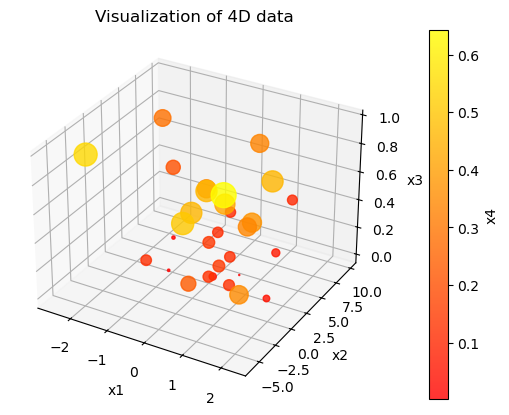

In [204]:
#To make sure output is the same every time
np.random.seed(0)

#Generate the data
sample_total = 30

#Normal distribution loc-mean, scale - std
x1 = norm.rvs(loc = 0, scale = 1, size = sample_total)
x2 = norm.rvs(loc = 2, scale = 4, size = sample_total)

#Uniform distribution loc - starting point, scale - width of range
x3 = uniform.rvs(loc = 0, scale = 1, size = sample_total)
z = uniform.rvs(loc = 0, scale = 1, size = sample_total)
x4 = x3 * z

#Creating a 3D scatter plot
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

#Size of the bubbles
sizes = 500 * x4

#Plotting 
bubble_plot = axis.scatter(x1, x2, x3, s = sizes, c = x4, cmap = 'autumn', alpha = 0.8)#alpha- to set transparency

cbar = plt.colorbar(bubble_plot, ax = axis, pad = 0.1)#padding to move the colorbar
cbar.set_label('x4')

#Adding labels for the axes
axis.set_xlabel('x1')
axis.set_ylabel('x2')
axis.set_zlabel('x3')
axis.set_title('Visualization of 4D data')

#Displaying the bubble plot
plt.show()

<br>Here we use a 3D scatter plot to visualize a 4D dataset in a 3D space where the fourth dimension represents the color, i.ie; we can adjust the color and the size of data points based on the values of the x4 to represent this dimension. By doing this, it makes it easier to understand the data distribution and variations related to x4.<br>

### Question 2

**Visualisation**

**Display a QQ plot for the following probability measures:**

- the standard normal (*Normal(0, 1)*) on the x-axis
- the standard Cauchy distribution (*Cauchy(0, 1)*) on the y-axis.

**What does the QQ plot tell us about the tails of these distributions?**


In [205]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

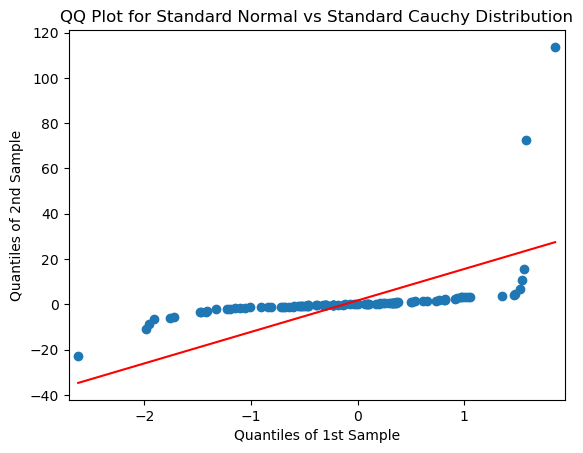

In [206]:
np.random.seed(42)
#Generate random samples from the standard normal and standard Cauchy distributions
total = 100

#Dataset with 100 samples for standard normal distribution with loc 0 and scale 1
normal_sample_dataset = np.random.normal(0, 1, total)

#Dataset with 100 samples for standard Cauchy distribution
cauchy_sample_dataset = np.random.standard_cauchy(total)

#Create a QQ plot with standard normal on the x-axis and standard Cauchy on the y-axis
sm.qqplot_2samples(normal_sample_dataset, cauchy_sample_dataset, line = 's')

plt.title('QQ Plot for Standard Normal vs Standard Cauchy Distribution')
plt.show()


+ When we create a QQ plot with the standard normal distribution (Normal(0, 1)) on the x-axis and the standard Cauchy distribution (Cauchy(0, 1)) on the y-axis, the plot visually demonstrates the differences in quantiles between the two distributions. 

+ The points on the QQ plot does not closely follow the reference line (the 45-degree line).
+ The points are more concentrated near the center of the plot.
+ The QQ plot clearly shows that the standard Cauchy distribution has much heavier tails compared to the standard normal distribution. The scatter of points away from the reference line depicts the extreme tail behavior of the standard Cauchy distribution.ion.tion.

### Question 3

**Independent Sum of Two Probability Measures**

Recall from the lectures that if we have two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum P1 + P2 is given by the convolution of the two densities, as follows:


$$
\begin{align*}
f_{1+2}(t) = \int_{-\infty}^{\infty} f_1(x)f_2(t - x) \, dx
\end{align*}
$$

##### In this question we consider the sum of Beta (2, 8) + Beta (8, 2). What is the support of Beta (2, 8)? What is the support of Beta (8, 2). Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?


In [207]:
from scipy.stats import beta

In [208]:
#Defining beta distributions
beta_1 = beta(2, 8)
beta_2 = beta(8, 2)

# Get the lower and upper bounds of the support
lower_bound_beta1 = beta_1.a
upper_bound_beta1 = beta_1.b

# Get the lower and upper bounds of the support for Beta(8, 2)
lower_bound_beta2 = beta_2.a
upper_bound_beta2 = beta_2.b
# Print the support
print(f'Support of Beta(2, 8): [{lower_bound_beta1}, {upper_bound_beta1}]')

# Print the support for Beta(8, 2)
print(f'Support of Beta(8, 2): [{lower_bound_beta2}, {upper_bound_beta2}]')

#Print support for Beta(2,8) + Beta(8,2)
print(f'Support of Beta(2, 8) + Beta(8, 2): [{lower_bound_beta1 + lower_bound_beta2}, {upper_bound_beta1 + upper_bound_beta2}]')

Support of Beta(2, 8): [0.0, 1.0]
Support of Beta(8, 2): [0.0, 1.0]
Support of Beta(2, 8) + Beta(8, 2): [0.0, 2.0]


##### Write a function which implements the integrand of the integral above, that is to say that implements f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2).
##### Next, generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) (using numpy’s linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad. Plot your result..)


In [209]:
from scipy.integrate import quad

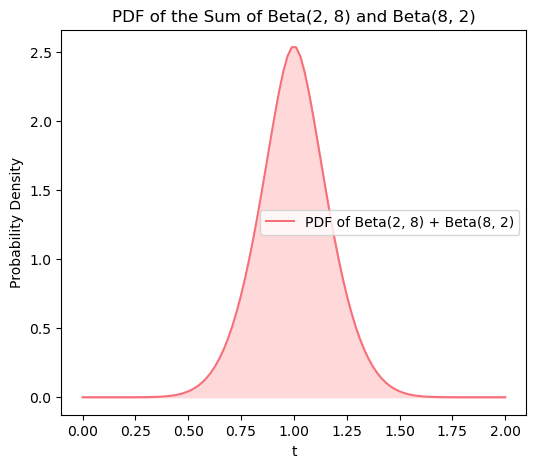

In [210]:
# Range = 0,2
support = [0, 2]
pdf_sum_list = []

# PDF of the beta distributions
pdf_beta_1 = beta(2, 8).pdf
pdf_beta_2 = beta(8, 2).pdf

#Convolution involves three major steps
#Calculate the integrand function
#Perform Integration
#PDF of the Sum

#Function for the integrand of convolution
def integrand_function_for_convolution(x, t):
    #Calculate product of pds at point x,t-x
    return pdf_beta_1(x) * pdf_beta_2(t - x)

#Generate 100 points along the support of the sum
points = np.linspace(support[0], support[1], 100)

#PDF of the sum distribution at these 100 points
for t in points:
    #Integrate with the interval 0, 1
    integral_result = quad(integrand_function_for_convolution, 0, 1, args = t)
    pdf_value = integral_result[0]
    pdf_sum_list.append(pdf_value)


#Plotting the PDF of the sum
plt.figure(figsize = (6, 5))
plt.plot(points, pdf_sum_list, label = 'PDF of Beta(2, 8) + Beta(8, 2)', color = '#F76F79')
plt.fill_between(points, pdf_sum_list, color = '#FFD9D9')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('PDF of the Sum of Beta(2, 8) and Beta(8, 2)')
plt.legend()
plt.show()


<br> This is the probability density function (PDF) of the sum of the two Beta distributions Beta(2, 8) and Beta(8, 2) calculated using convolution. It represents the expected distribution of the sum. <br>

##### Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the histogram of these sums along with the pdf computed in the previous step. What do you observe?

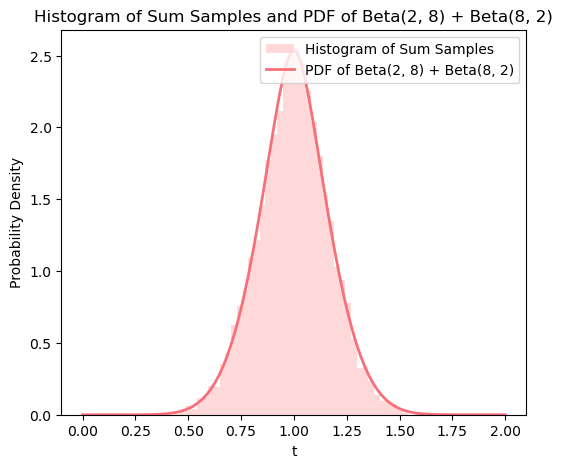

In [211]:
#Generate 10,000 samples from Beta(2, 8) and Beta(8, 2), add them, and plot the histogram
samples_beta_1 = beta(2, 8).rvs(size = 10000)
samples_beta_2 = beta(8, 2).rvs(size = 10000)
sum_of_samples = samples_beta_1 + samples_beta_2

plt.figure(figsize = (6, 5))
plt.hist(sum_of_samples, bins = 50, density = True, label = 'Histogram of Sum Samples', color = '#FFD9D9')
plt.plot(points, pdf_sum_list, label = 'PDF of Beta(2, 8) + Beta(8, 2)', linewidth = 2, color = '#F76F79')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('Histogram of Sum Samples and PDF of Beta(2, 8) + Beta(8, 2)')
plt.legend()
plt.show()

+ The histogram represents the distribution of values obtained by adding 10,000 random samples from the Beta(2, 8) distribution and Beta(8, 2) distribution. Area under histogram signifies probability density. 
+ The comparison between the 2 plots makes us understand how well the sampled data matches the expected probability distribution. We can also understand that the sampled data is consistent with the sum of Beta(2,8) and Beta(8,2) distributions.
+ The histogram appears more smoothed and bell-shaped as we increase samples. This is due to the Central Limit Theorem, which states that the distribution of the sum of independent random variables becomes approximately normal when the sample size is increased.

### Question 4

**Sample mean process and sample mean distribution**

Write a function called sample_mean taking as inputs two integers m and n. The function should return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000), sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for each of these outputs.


In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

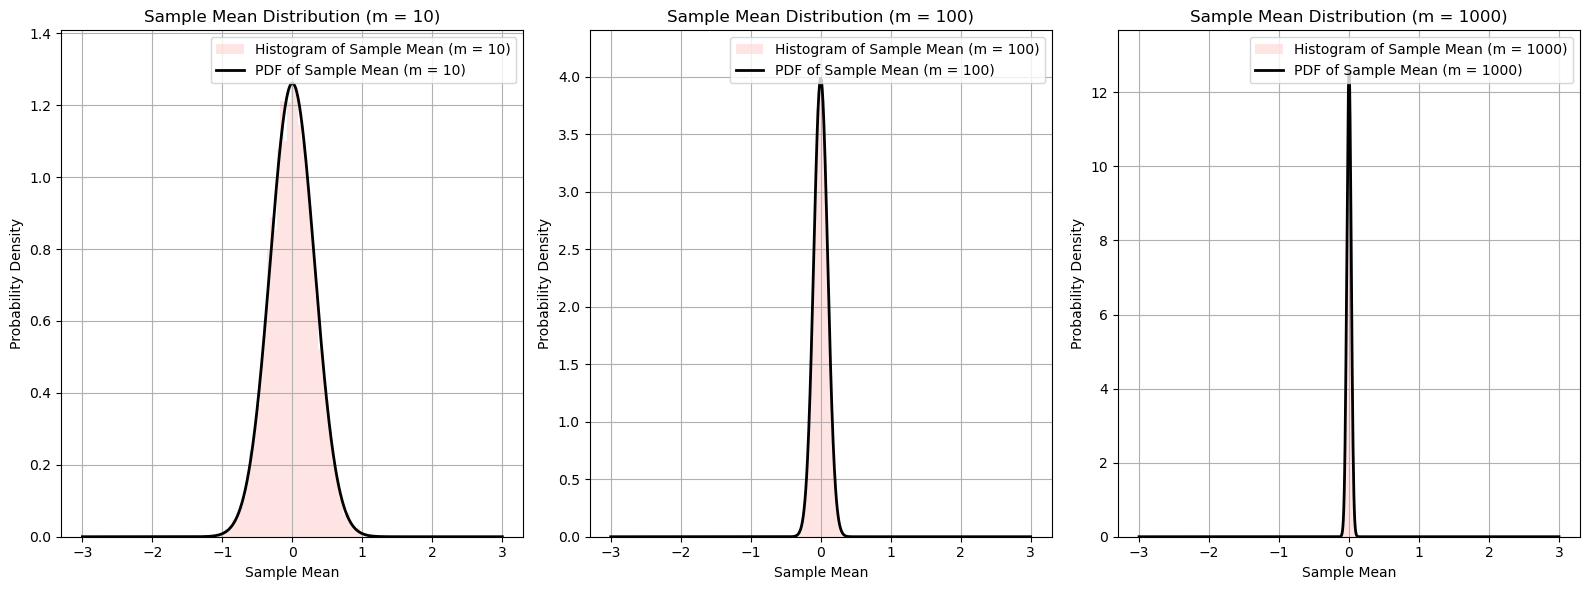

In [221]:
#Function to generate sample means
def sample_mean(m, n):
    # Normal distribution mean = 0, std = 1
    sample_means = np.mean(np.random.normal(0, 1, (m, n)), axis=0)
    return sample_means

#Sample mean distribution class
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m
    
    def pdf_sample_mean(self, x_values):
        return norm.pdf(x_values, loc=0, scale=1/np.sqrt(self.m))

m_values = [10, 100, 1000]
n = 10000

#Create subplots
fig, axs = plt.subplots(1, len(m_values), figsize=(16, 6))

#Generate sample means and plot histograms
for i, m in enumerate(m_values):
    sample_means = sample_mean(m, n)
    
    axs[i].hist(sample_means, bins=50, density=True, alpha=0.7, label = f'Histogram of Sample Mean (m = {m})', color='#FFD9D9')
    
    #Plotting the PDF
    x_values = np.linspace(-3, 3, 1000)
    pdf_sample_mean = sample_mean_distribution(m).pdf_sample_mean(x_values)
    axs[i].plot(x_values, pdf_sample_mean, label = f'PDF of Sample Mean (m = {m})', linewidth = 2, color = '#F76F79')
    
    axs[i].set_xlabel('Sample Mean')
    axs[i].set_ylabel('Probability Density')
    axs[i].set_title(f'Sample Mean Distribution (m = {m})')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


**By solving the first question of the Theory part, write a class called `sample_mean_distribution` whose constructor takes an integer `m` as input and implements the probability measure:**

$$
\text{Normal}(0, 1)^m \equiv \frac{1}{m} \sum_{i=1}^{m} \text{Normal}(0, 1)
$$


**in other words, the distribution of the length-m estimator of the mean. Instantiate the objects `sample_mean_distribution(10)`, `sample_mean_distribution(100)`, `sample_mean_distribution(1000)`, and plot their PDFs.**

In [214]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

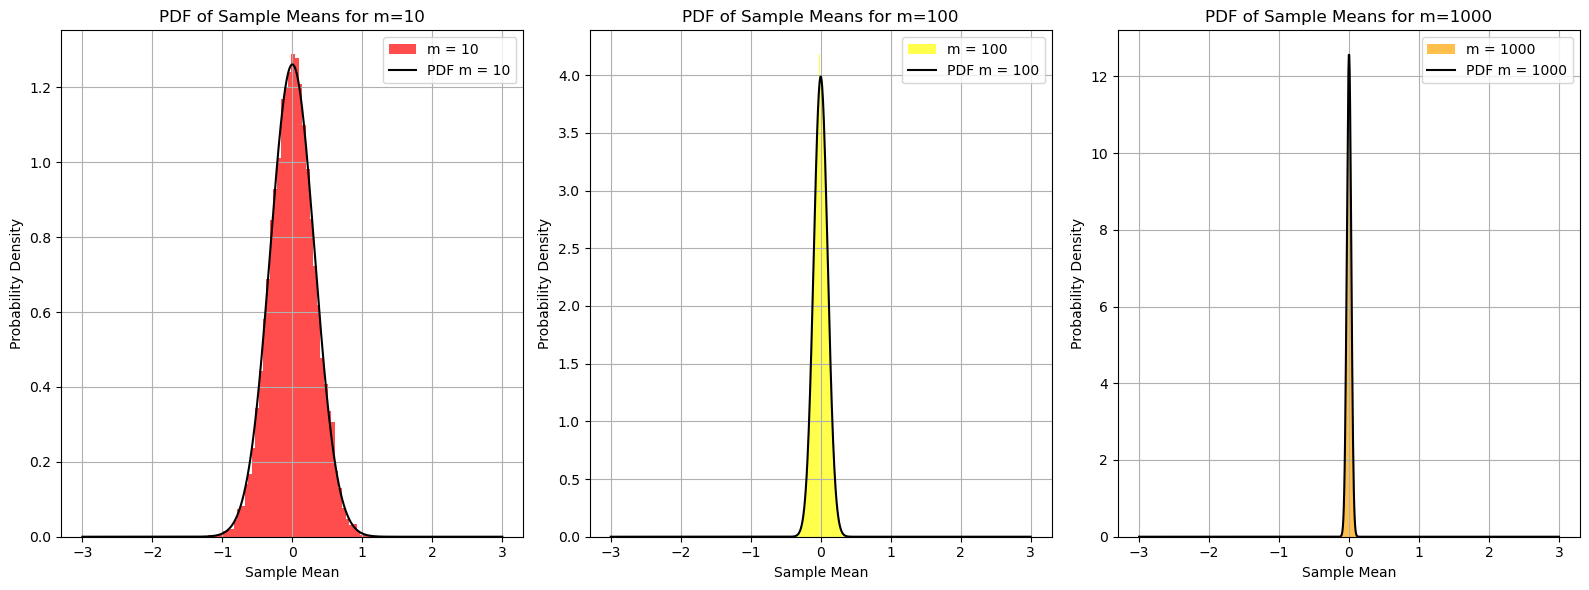

In [215]:
#Creating sample means
def sample_mean(m, n):
    sample_means = []
    for _ in range(n):
        samples = np.random.normal(0, 1, m)
        sample_means.append(np.mean(samples))
    return sample_means

sample_means_list = []
m_values = [10, 100, 1000]
n = 10000
colors = ['red', 'yellow', 'orange']

for m in m_values:
    sample_means = sample_mean(m, n)
    sample_means_list.append(sample_means)  # Store the sample means in the list

#Sample Mean Distribution Class
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        return norm.pdf(x, loc=0, scale=1/np.sqrt(self.m))

#Create subplots
fig, axs = plt.subplots(1, len(m_values), figsize=(16, 6))

#Calculating and Storing PDFs
pdfs = []
x = np.linspace(-3, 3, 1000)

for i, m in enumerate(m_values):
    sample_means = sample_means_list[i]  # Retrieve the sample means from the list
    axs[i].hist(sample_means, bins = 50, density = True, alpha = 0.7, label = f'm = {m}', color=colors[i])
    
    sample_dist = sample_mean_distribution(m)
    pdf = [sample_dist.pdf(value) for value in x]
    pdfs.append(pdf)

    axs[i].plot(x, pdf, label = f'PDF m = {m}', color='black')  # Plot the PDF
    axs[i].set_xlabel('Sample Mean')
    axs[i].set_ylabel('Probability Density')
    axs[i].set_title(f'PDF of Sample Means for m={m}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [217]:
#Printing PDF values for different m
#for i, m in enumerate(m_values):
#    print(f"PDF for m={m}",pdfs[i])


+ The PDF values for the three different values of m are printed. However, as we can see that the PDF values for larger values of m are extremely close to the PDF of a standard normal distribution (mean 0, variance 1). This is a direct illustration of the Central Limit Theorem.

+ As m increases from 10 to 100 to 1000, the PDF of the sample mean is same as standard normal distribution.
+ The Central Limit Theorem (CLT) states that as the sample size increases, the distribution of the sample mean becomes increasingly normal, even if the original data is not normally distributed.

<br>By plotting these histograms, we can visually inspect how the distribution of the sample means changes as the sample size (m) varies.<br>

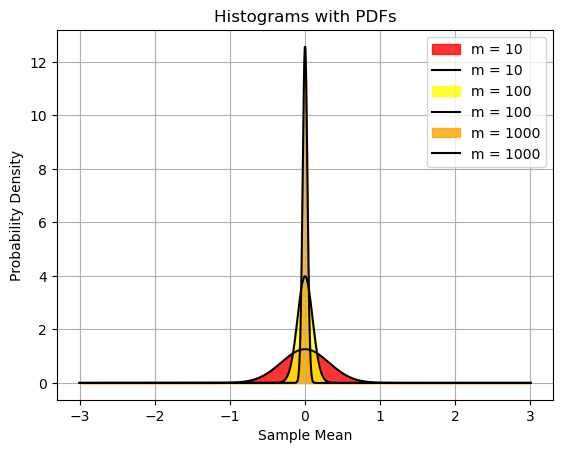

In [220]:
#Plotting PDFs of Sample Mean Distributions
for i, m in enumerate(m_values):
    sample_dist = sample_mean_distribution(m)
    pdf = [sample_dist.pdf(value) for value in x]
    plt.fill_between(x, pdf, color = colors[i], alpha = 0.8, label = f'm = {m}')
    plt.plot(x, pdf, label = f'm = {m}', color = 'black')
    
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.title('Histograms with PDFs')
plt.legend()
plt.grid(True)
plt.show()

**Compare (a) the 3 histograms, (b) the 3 PDFs and (c) the histograms with the PDF. What conclusions
do you draw?**

**Histogram for Sample Mean**

+ As 'm' increases, the shape of the PDF becomes increasingly bell-shaped and symmetric almost like a normal distribution.
+ This confirms the Central Limit Theorem(CLT). It thereby becomes more concentrated around mean(0) and displays a bell-shaped curve.
+ For large sample sizes like m = 1000, the sample mean distribution is very close to a normal distribution, which validates the CLT.

**Probability Density Functions**

+ The PDFs are symmetric and bell-shaped, consistent with the properties of the normal distribution. 
+ As the sample size m increases, the standard deviation of the PDF decreases, making the distribution narrower and taller.

**Histograms with PDFs**

+ The histograms align more closely with the corresponding PDFs as the sample size increases.


#### Conclusions

As the sample size m increases, the shape of the sample mean distribution becomes more normal (bell-shaped). This analysis supports the conclusions of the Central Limit Theorem, illustrating how the distribution of sample means becomes more normal as the sample size increases.
